In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

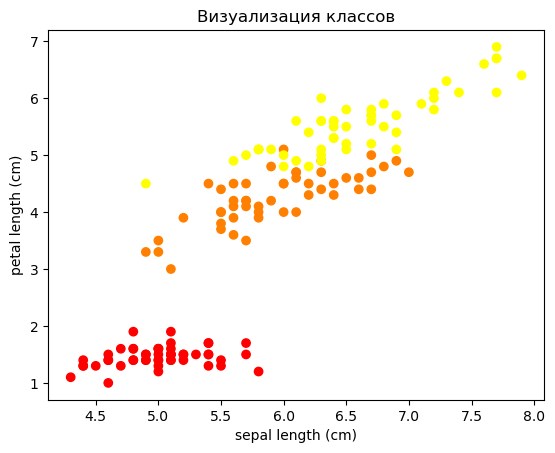

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

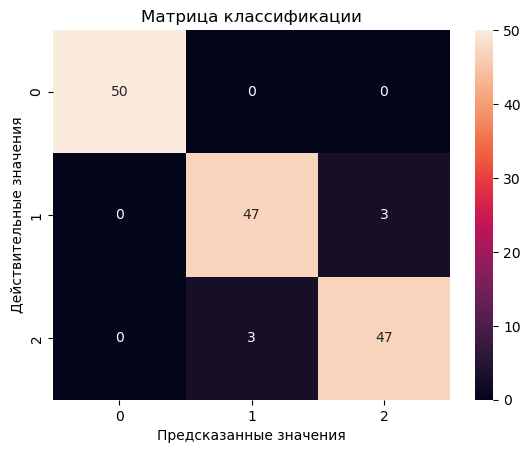

In [ ]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [ ]:
print(classification_report(y_pred, y))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

In [ ]:
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


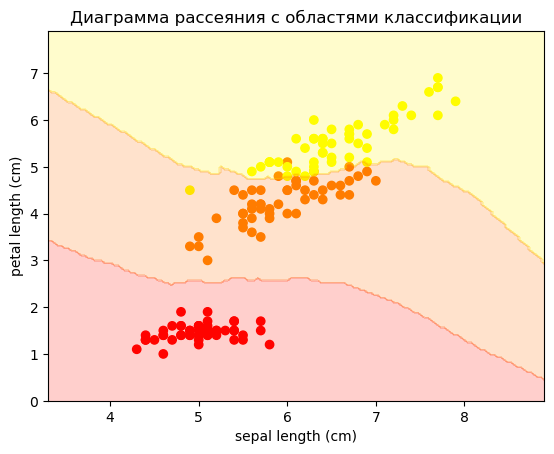

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [ ]:
observation_new = [[5.5, 5]]

In [ ]:
observation_new_scaled = scaler.transform(observation_new)

C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
knn.predict(observation_new_scaled)

array([2])

In [ ]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [ ]:
distances, indices = knn.kneighbors(observation_new_scaled)

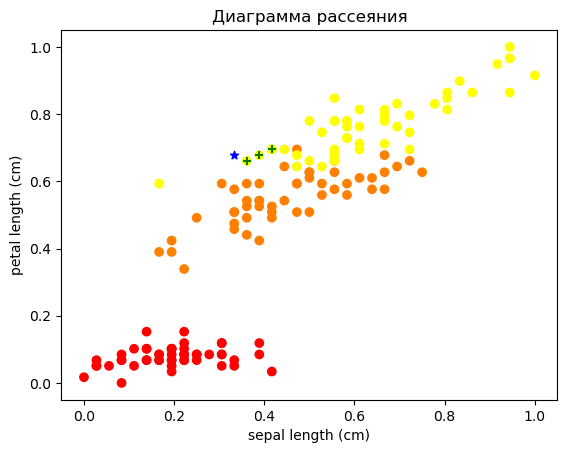

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

# №1 Постройте последний график методических указаний в исходном пространстве.

# Код использует обратное преобразование для восстановления значений в исходное пространство и строит диаграмму рассеяния с новым наблюдением, помеченным звездой, и точками ближайших соседей, помеченными плюсами.

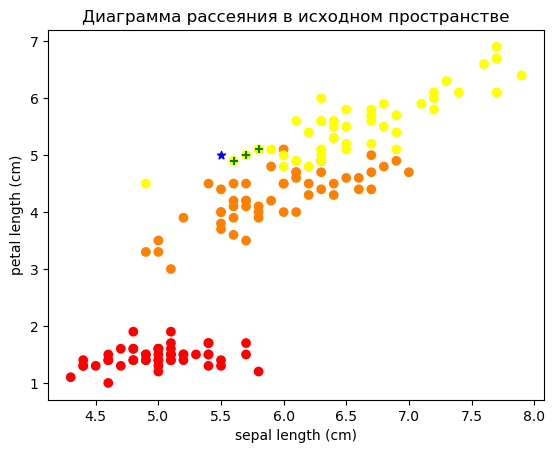

In [ ]:
observation_new_original = scaler.inverse_transform(observation_new_scaled)# Обратное преобразование нового наблюдения
neighbors_original = scaler.inverse_transform(X_scaled[indices[0]]) # Обратное преобразование точек ближайших соседей

# Построение графика в исходном пространстве
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.scatter(observation_new_original[0][0], observation_new_original[0][1], marker='*', color='b')
plt.scatter(neighbors_original[:, 0], neighbors_original[:, 1], marker='+', color='g')

plt.title("Диаграмма рассеяния в исходном пространстве")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()


# №2 Попробуй обучить модель другим значением k. Визуализируйте региональную классификацию и сравните модели эффективности.

# В этом коде новая модель knn_new обучается с использованием другого значения k (в данном случае, k=10). После этого региональная классификация визуализируется для сравнения с предыдущей моделью.

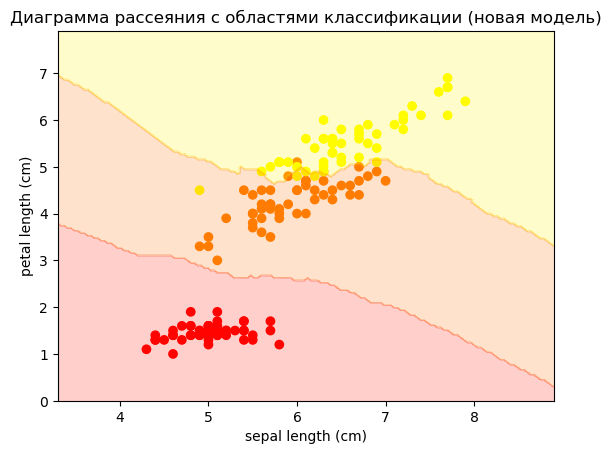

In [ ]:
# Обучение модели для другого значения k
knn_new = KNeighborsClassifier(n_neighbors=10)  # Изменение значение k
knn_new.fit(X_scaled, y)

# Визуализация региональной классификации для новой модели
Z_new = knn_new.predict(XX_scaled).reshape(X0_grid.shape)

# Построение графика в исходном пространстве
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z_new, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации (новая модель)")
plt.show()


# №3 Подвигайте новое наблюдение в последние построения методических указаний. Установите его за пределы области выбора выбора. Как меняется нормализованное значение?

In [ ]:
# Создание нового наблюдения за пределами области выбора
observation_outside = np.array([[8.0, 4.0]])

# Нормализация нового наблюдения за пределами области
observation_outside_scaled = scaler.transform(observation_outside)

# Вывод нормализованного нового наблюдения
print("Нормализованное новое наблюдение за пределами области:")
print(observation_outside_scaled)


Нормализованное новое наблюдение за пределами области:
[[1.02777778 0.50847458]]


C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# В данном случае, значение 1.02777778 для первого признака может означать, что sepal length нового наблюдения превышает максимальное значение sepal length в обучающем наборе. А значение 0.50847458 для второго признака показывает, что petal length находится в пределах обучающего диапазона.

# №4 Поэкспериментируйте с разными метриками расстояний. Визуализируйте соседей нового объекта в разных метрах расстояния.


# будем использовать метрики "euclidean" (евклидова метрика) и "manhattan" (манхэттенская метрика).

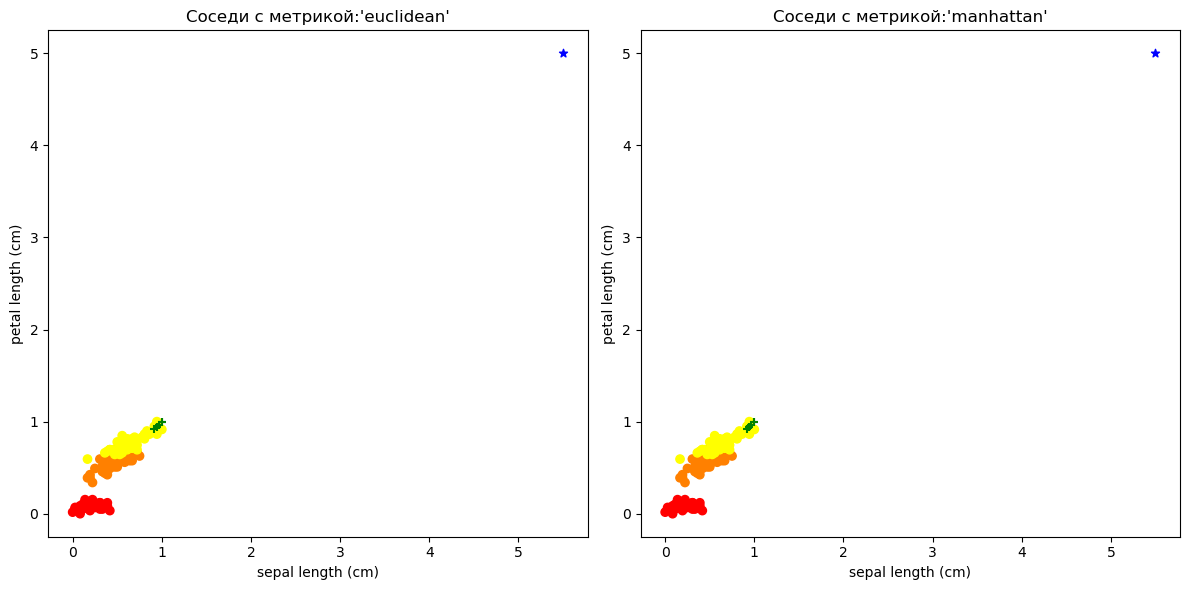

In [ ]:
# Создание нового наблюдения
observation_new = np.array([[5.5, 5]])

# Выбор разных метрик расстояния
metrics = ['euclidean', 'manhattan']

# Визуализация соседей для каждой метрики
plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics, 1):
    knn_metric = KNeighborsClassifier(n_neighbors=3, metric=metric) # Настраиваме количество соседей (n_neighbors):
    knn_metric.fit(X_scaled, y)

    # Вычисление соседей для нового наблюдения
    distances, indices = knn_metric.kneighbors(observation_new)

    # Визуализация соседей
    plt.subplot(1, 2, i)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
    plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')
    plt.scatter(X_scaled[indices[0]], X_scaled[indices[0]], marker='+', color='g')  # Изменено это место
    plt.title(f"Соседи с метрикой:'{metric}'")
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')

plt.tight_layout()
plt.show()
